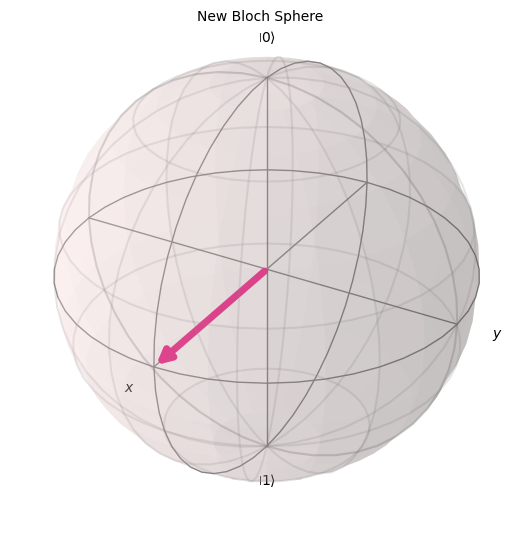

In [3]:
from qiskit.visualization import plot_bloch_vector
 
plot_bloch_vector([1,0,0], title="New Bloch Sphere")

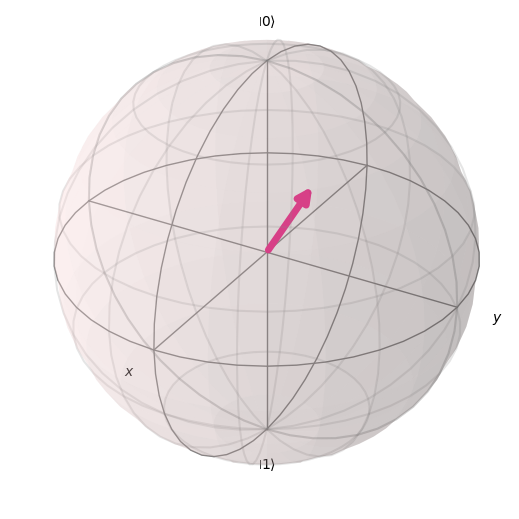

In [4]:
import numpy as np
from qiskit.visualization import plot_bloch_vector
 
# You can use spherical coordinates instead of cartesian.
 
plot_bloch_vector([0.5, np.pi/6, np.pi/2], coord_type='spherical')

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


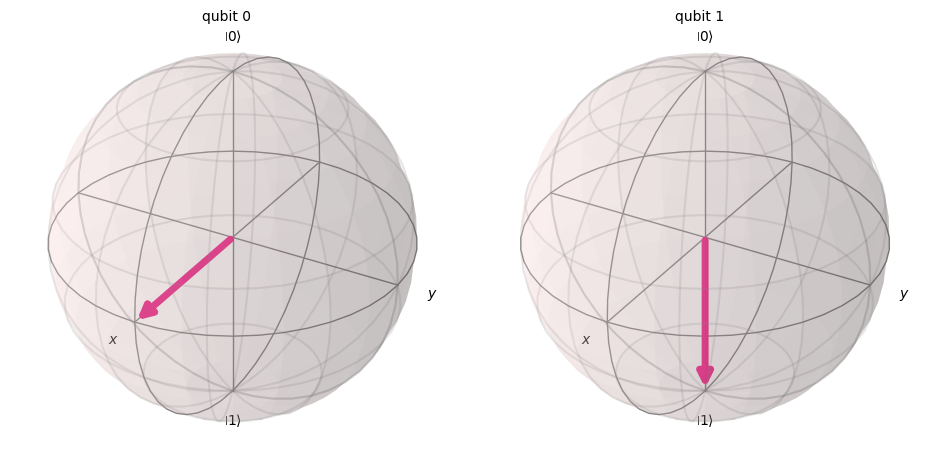

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
print(state)
plot_bloch_multivector(state)

In [6]:
import cirq

# Define a qubit
qubit = cirq.LineQubit(0)

# Define a Hadamard gate
hadamard_gate = cirq.H(qubit)

# Get the unitary matrix associated with the Hadamard gate
hadamard_matrix = cirq.unitary(hadamard_gate)

print("Hadamard gate unitary matrix:")
print(hadamard_matrix)


Hadamard gate unitary matrix:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


In [7]:
import cirq

# Define two qubits
qubit1 = cirq.LineQubit(0)
qubit2 = cirq.LineQubit(1)
# Create a quantum circuit
circuit = cirq.Circuit()

# Apply Hadamard gate to the first qubit
hadmard_gate= cirq.H(qubit1)
circuit.append(hadmard_gate)

hadamard_matrix = cirq.unitary(hadamard_gate)
print(hadamard_matrix)

# Apply CNOT gate with qubit1 as the control and qubit2 as the target
C_not=cirq.CNOT(qubit1, qubit2)
circuit.append(C_not)
C_not_matrix = cirq.unitary(C_not)
print(C_not_matrix)

# Apply Pauli-X gate to the second qubit
circuit.append(cirq.X(qubit2))
# Print the circuit
print("Circuit:")
print(circuit)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.simulate(circuit)

# Get the state vector
state_vector = result.final_state_vector

# Print the final state vector
print("\nFinal State Vector:")
print(state_vector)


[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
Circuit:
0: ───H───@───────
          │
1: ───────X───X───

Final State Vector:
[0.        +0.j 0.70710677+0.j 0.70710677+0.j 0.        +0.j]


In [8]:
import numpy as np
import cirq

# Define two qubits
q0, q1 = cirq.LineQubit.range(2)

# Create quantum circuits representing the states
circuit1 = cirq.Circuit(cirq.H(q0))  # Apply Hadamard gate to create |+⟩
circuit2 = cirq.Circuit(cirq.X(q0))  # Apply X gate to create |1⟩

# Get the state vectors of the circuits
simulator = cirq.Simulator()
result1 = simulator.simulate(circuit1)
result2 = simulator.simulate(circuit2)

state_vector1 = result1.final_state_vector
state_vector2 = result2.final_state_vector

# Calculate the inner product of the two states
inner_product = np.vdot(state_vector1, state_vector2)

print("State 1 Vector:", state_vector1)
print("State 2 Vector:", state_vector2)
print("Inner Product:", inner_product)




State 1 Vector: [0.70710677+0.j 0.70710677+0.j]
State 2 Vector: [0.+0.j 1.+0.j]
Inner Product: (0.70710677+0j)


In [9]:
import numpy as np
import cirq

# Define two qubits
qubits = cirq.LineQubit.range(2)

# Define the set of possible gates to apply
possible_gates = [cirq.X, cirq.Y, cirq.Z, cirq.H]

# Initialize a list to store final state vectors and corresponding gates
final_states_and_gates = []

# Number of simulation runs
num_simulations = 10

# Perform simulations
for _ in range(num_simulations):
    # Create a quantum circuit
    circuit = cirq.Circuit()
    
    # Initialize a list to store gates applied for this simulation
    gates_applied = []
    
    # Apply random gates to the qubits
    for qubit in qubits:
        gate = np.random.choice(possible_gates)
        gates_applied.append(gate)
        circuit.append(gate(qubit))
        
    
    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    
    # Get the final state vector
    final_state = result.final_state_vector
    
    # Convert the final state vector to a tuple for hashability
    final_state_tuple = tuple(np.round(final_state, 10))  # Round for numerical stability
    
    # Add the final state vector and corresponding gates to the list
    final_states_and_gates.append((final_state_tuple, gates_applied))

# Print all the final states and corresponding gates applied
print("All Possible Final States and Corresponding Gates:")
for i, (state, gates) in enumerate(final_states_and_gates):
    print(f"State {i+1}: {state}")
    print(f"Gates Applied: {gates}")
    print()


All Possible Final States and Corresponding Gates:
State 1: (np.complex64(0j), np.complex64(0j), np.complex64(0.70710677+0j), np.complex64(0.70710677+0j))
Gates Applied: [cirq.X, cirq.H]

State 2: (np.complex64(0j), np.complex64(0j), np.complex64(0j), np.complex64(1+0j))
Gates Applied: [cirq.X, cirq.X]

State 3: (np.complex64(0j), np.complex64(-0+0j), np.complex64(1j), np.complex64(-0+0j))
Gates Applied: [cirq.Y, cirq.Z]

State 4: (np.complex64(0j), np.complex64(0j), np.complex64(0.70710677j), np.complex64(0.70710677j))
Gates Applied: [cirq.Y, cirq.H]

State 5: (np.complex64(0j), np.complex64(0j), np.complex64(0j), np.complex64(1j))
Gates Applied: [cirq.Y, cirq.X]

State 6: (np.complex64(0j), np.complex64(0j), np.complex64(0.70710677+0j), np.complex64(0.70710677+0j))
Gates Applied: [cirq.X, cirq.H]

State 7: (np.complex64(0j), np.complex64(-0+0j), np.complex64(1j), np.complex64(-0+0j))
Gates Applied: [cirq.Y, cirq.Z]

State 8: (np.complex64(0.5+0j), np.complex64(0.5+0j), np.complex64(0

In [10]:
import numpy as np

# Define two matrices
matrix_A = np.array([[1, 2], [3, 4]])
matrix_B = np.array([[5, 6], [7, 8]])

# Matrix multiplication
matrix_mult = np.dot(matrix_A, matrix_B)
print("Matrix Multiplication:")
print(matrix_mult)

# Transpose of a matrix
matrix_A_transpose = np.transpose(matrix_A)
print("\nTranspose of Matrix A:")
print(matrix_A_transpose)

# Conjugate of a matrix (for real matrices, conjugate is same as transpose)
matrix_A_conjugate = np.conjugate(matrix_A)
print("\nConjugate of Matrix A:")
print(matrix_A_conjugate)

# Inner product of two matrices
inner_product = np.vdot(matrix_A, matrix_B)
print("\nInner Product of Matrix A and Matrix B:")
print(inner_product)

# Hamiltonian of a matrix (Hermitian conjugate)
matrix_H = np.array([[1, 2j], [-2j, 3]])
matrix_H_hermitian = np.conjugate(np.transpose(matrix_H))
print("\nHamiltonian of Matrix H:")
print(matrix_H_hermitian)

# Unitary matrix (product of a matrix and its Hermitian conjugate should be identity matrix)
matrix_U = np.array([[0.5+0.5j, 0.5-0.5j], [0.5-0.5j, 0.5+0.5j]])
identity_matrix = np.dot(matrix_U, np.conjugate(np.transpose(matrix_U)))
print("\nUnitary Matrix U:")
print(matrix_U)
print("\nProduct of U and its Hermitian Conjugate (Should be Identity Matrix):")
print(identity_matrix)


Matrix Multiplication:
[[19 22]
 [43 50]]

Transpose of Matrix A:
[[1 3]
 [2 4]]

Conjugate of Matrix A:
[[1 2]
 [3 4]]

Inner Product of Matrix A and Matrix B:
70

Hamiltonian of Matrix H:
[[ 1.-0.j -0.+2.j]
 [ 0.-2.j  3.-0.j]]

Unitary Matrix U:
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

Product of U and its Hermitian Conjugate (Should be Identity Matrix):
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [11]:
import numpy as np

# Define two matrices
matrix_A = np.array([[1, 2], [3, 4]])
matrix_B = np.array([[5, 6], [7, 8]])

# Compute the tensor product of the two matrices
tensor_product = np.kron(matrix_A, matrix_B)
print("Tensor Product of Matrix A and Matrix B:")
print(tensor_product)
#In this example, we compute the tensor product of two matrices matrix_A and matrix_B using the np.kron() function from NumPy.

#The tensor product A ⊗ B of two matrices A and B is defined as follows:

#If A is an m × n matrix and B is a p × q matrix, then the tensor product A ⊗ B is an (m × p) × (n × q) matrix.
#Each element of the resulting matrix is obtained by multiplying each element of matrix A by the entire matrix B.'

Tensor Product of Matrix A and Matrix B:
[[ 5  6 10 12]
 [ 7  8 14 16]
 [15 18 20 24]
 [21 24 28 32]]


In [12]:
import numpy as np

# Define the individual qubit states
psi_1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # |0⟩ + |1⟩
psi_2 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])  # |0⟩ - |1⟩

# Compute the tensor product to get the composite state
composite_state = np.kron(psi_1, psi_2)

# Print the composite state
print("Composite State of the Two Qubits:")
print(composite_state)


Composite State of the Two Qubits:
[ 0.5 -0.5  0.5 -0.5]


In [14]:
from qiskit import QuantumCircuit,  ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from numpy import sqrt
# Create a quantum register with 1 qubit
qr = QuantumRegister(1)

# Create a classical register with 1 bit
cr = ClassicalRegister(1)

# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

# Apply a Hadamard gate to generate a superposition of |0⟩ and |1⟩
circuit.h(qr[0])

# Measure the qubit and store the result in the classical register
circuit.measure(qr, cr)
# Choose the AerSimulator backend
simulator = AerSimulator()

# Simulate the circuit
job = simulator.run(qc, shots=10)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(qc))
# Visualize the circuit
print(qc)

# Visualize the measurement outcomes
plot_histogram(result.get_counts(qc))


QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000028DFF797690>"'

{'1100': 11, '0111': 4, '0110': 5, '1111': 7, '1011': 9, '0001': 6, '1000': 8, '1110': 2, '0011': 8, '0010': 8, '0100': 7, '1010': 7, '0000': 5, '1101': 5, '1001': 6, '0101': 2}
       ┌───┐┌─┐         
q10_0: ┤ H ├┤M├─────────
       ├───┤└╥┘┌─┐      
q10_1: ┤ H ├─╫─┤M├──────
       ├───┤ ║ └╥┘┌─┐   
q10_2: ┤ H ├─╫──╫─┤M├───
       ├───┤ ║  ║ └╥┘┌─┐
q10_3: ┤ H ├─╫──╫──╫─┤M├
       └───┘ ║  ║  ║ └╥┘
 c9: 4/══════╩══╩══╩══╩═
             0  1  2  3 


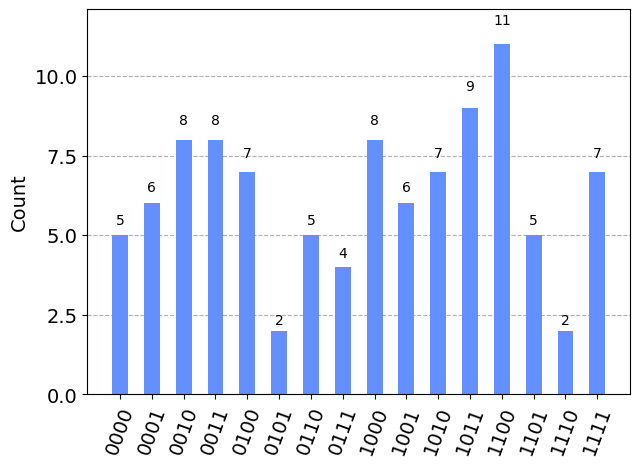

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum register with 8 qubits
qr = QuantumRegister(4)

# Create a classical register with 8 bits
cr = ClassicalRegister(4)

# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

# Apply Hadamard gates to all qubits to generate a superposition of |0⟩ and |1⟩
for i in range(4):
    circuit.h(qr[i])

# Measure all qubits and store the results in the classical register
circuit.measure(qr, cr)

# Choose the AerSimulator backend
simulator = AerSimulator()

# Simulate the circuit
job = simulator.run(circuit, shots=100)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(circuit))

# Visualize the circuit
print(circuit)

# Visualize the measurement outcomes
plot_histogram(result.get_counts(circuit))
